In [1]:
from pre_processing import read_pre_processed_data
from utils import get_info
from analysis import get_most_common_tracks, get_tracks_audio_features
import pandas as pd

In [2]:
playlists_df, tracks_df, relations_df = read_pre_processed_data("../data/processed")

In [28]:
df = get_most_common_tracks(tracks_df, relations_df, n=10_000)

In [4]:
client_id = "b1f06ec1ff1e4897854995cc439795da"
client_secret = "e52480557d1d4838a83f9a6b1af16f30"

In [ ]:
sample_tracks_df = tracks_df.sample(10_000)
sample_audio_df = get_tracks_audio_features(sample_tracks_df, client_id, client_secret)

In [29]:
top_tracks_df = df.join(tracks_df, lsuffix="_left")
top_audio_df = get_tracks_audio_features(top_tracks_df, client_id, client_secret)

In [10]:
sample_audio_df.describe()

,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.544652,0.587582,119.474744,-9.626194,0.472249,0.088628,0.222160,0.209928,0.354867
std,0.185915,0.268753,30.084814,5.630543,0.270802,0.114062,0.350776,0.190472,0.354738
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.387750,96.000500,-11.983750,0.243000,0.035500,0.000000,0.095500,0.020175
50%,0.560000,0.627500,119.972000,-8.121000,0.463000,0.047600,0.000648,0.129000,0.220000
75%,0.685000,0.813000,137.940750,-5.772000,0.695000,0.083800,0.429000,0.265250,0.690000
max,0.979000,1.000000,229.886000,2.665000,1.000000,0.962000,0.999000,0.996000,0.996000


In [30]:
top_audio_df.describe()

,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.615109,0.660079,121.577045,-6.877009,0.504646,0.093852,0.027939,0.185960,0.209287
std,0.151044,0.195347,28.637203,3.049144,0.234551,0.097489,0.122471,0.146589,0.252487
min,0.113000,0.012100,43.509000,-30.016000,0.034000,0.022500,0.000000,0.015700,0.000005
25%,0.514000,0.534000,99.019750,-8.294500,0.320000,0.035700,0.000000,0.093900,0.020800
50%,0.620000,0.686000,120.146000,-6.251000,0.498000,0.051100,0.000002,0.125000,0.096300
75%,0.725000,0.813000,139.986250,-4.802000,0.688000,0.105000,0.000314,0.241000,0.313000
max,0.986000,0.996000,219.175000,0.490000,0.990000,0.944000,0.987000,0.990000,0.996000


In [31]:
sample_audio_df["label"] = "sample"
top_audio_df["label"] = "top"

In [32]:
hist_df = pd.concat([top_audio_df, sample_audio_df], ignore_index=True)

In [33]:
import seaborn as sns

<Axes: xlabel='danceability', ylabel='Density'>

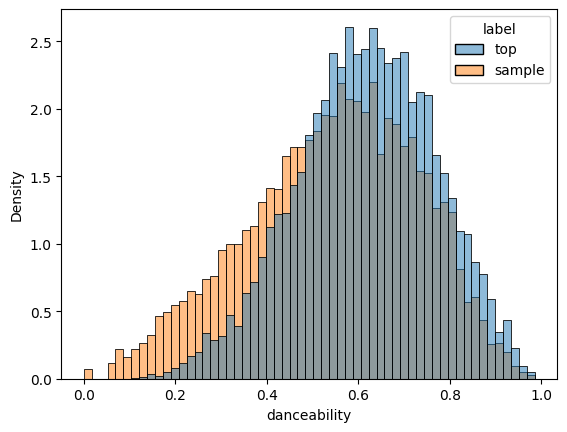

In [34]:
sns.histplot(hist_df, x="danceability", hue="label", stat="density", common_norm=False)